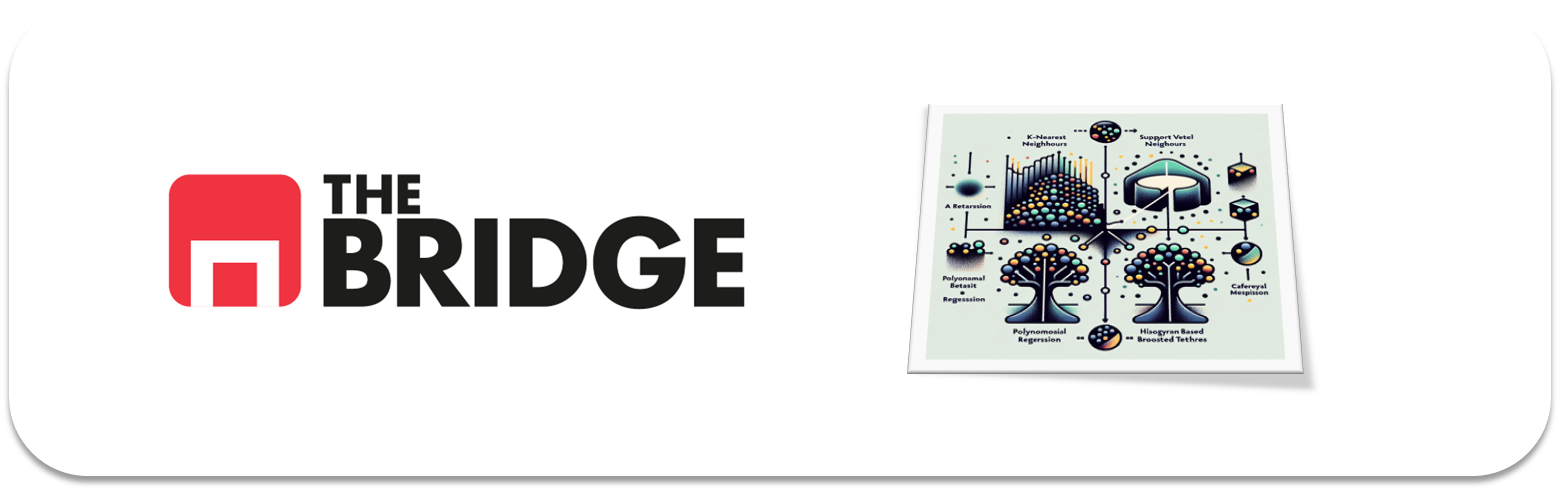

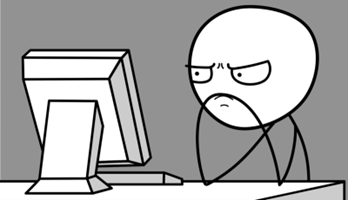

Para hacer un **repaso a los problemas de clasificacion con ML**, completa los siguientes ejercicios. Recuerda que necesitar√°s datos que est√°n en el directorio data que acompa√±a al notebook (b√∫scalo en el repositorio de ejercicios)
  
La soluci√≥n a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### INTRODUCCI√≥N: PROCESO DE ML

En los siguientes ejercicios vamos a seguir (de nuevo) los pasos b√°sicos en la creaci√≥n de un modelo de ML para resolver un problema de predicci√≥n a partir de un dataset que incluye el target, es decir, un aprendizaje supervisado.

En concreto, vamos a trabajar sobre un problema de clasificaci√≥n a trav√©s de los siguientes pasos:

1. Entendimiento del problema (selecci√≥n de la m√©trica m√°s adecuada)  
2. Obtenci√≥n de datos y primer contacto  
3. Train y Test  
4. MiniEDA: An√°lisis del target, an√°lisis bivariante, entendimiento de las features, selecci√≥n de las mismas (si es necesario)  
5. Preparaci√≥n del dataset de Train: Conversi√≥n de categ√≥ricas, tratamiento de num√©ricas  
6. Selecci√≥n e instanciaci√≥n de modelos. Baseline.
7. Comparaci√≥n de modelos (lo haremos por comparaci√≥n con validaci√≥n, puedes hacerlo por comparaci√≥n de modelos de hiperpar√°metros optimizados, si as√≠ lo prefieres)  
8. Selecci√≥n de modelo: Optimizaci√≥n de hiperpar√°metros (ten en cuenta la nota de 7)  
9. Equilibrado del train set  
10. Evaluaci√≥n contra test.  
11. An√°lisis de errores, posibles acciones futuras.  
12. EXTRA: Persistencia del modelo en disco.  

### El problema

La unidad oncol√≥gica del hospital de Madison, Wisconsin, est√° trabajando en un tratamiento muy prometedor sobre el c√°ncer de mama. Desgraciadamente es un tratamiento con efectos secundarios y todav√≠a excesivamente caro, pero cuya efectividad es extraordinaria si se aplica en las primeras etpas o incluso antes de haberlo desarrollado. 

En este sentido, la univeridad quiere disponer de un modelo que le permita detectar potenciales pacientes pero con un alto nivel de acierto en detectar quien puede tener c√°ncer para no aplicar el tratamiento a personas que no fueran a desarrollarlo y por tanto no s√≥lo perder dinero, sino tambi√©n, y m√°s importante causar problemas a esas personas. 

Nos piden trabajar sobre datos que ya tienen, y que pueden obtener facilmente de cualquier futuro aspirante a las pruebas y ensayos con el tratamiento, de pacientes que desarrollaron y no el c√°ncer. Sobre ese dataset quieren que les proporcionemos el mejor modelo de predicci√≥n de qui√©n desarrollar√° o no el c√°ncer y que cumpla con las expectativas del p√°rrafo anterior.

### Ejercicio 0

Importa los paquetes y m√≥dulos que necesites a lo largo del notebook

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score

### Ejercicio 1: Entendiendo el problema de "Negocio"

En funci√≥n de la descripci√≥n del problema de "negocio" y sin mirar todav√≠a los datos, ¬øqu√© tipo de problema de clasificaci√≥n vamos a resolver? ¬øQu√© m√©tricas creess m√°s conveniente para medir el rendimiento del modelo a construir y, por tanto, para comparar posibles modelos entre s√≠?

Tipo de Problema de Clasificaci√≥n
Este es un problema de clasificaci√≥n binaria, ya que se busca predecir si un paciente desarrollar√° o no c√°ncer de mama. La variable objetivo (target) ser√° binaria con dos clases:

Clase positiva: Paciente que desarrollar√° c√°ncer.
Clase negativa: Paciente que no desarrollar√° c√°ncer.
Selecci√≥n de la M√©trica m√°s Adecuada
Dado que el problema involucra diagn√≥stico m√©dico, donde los falsos negativos (FNs) son m√°s cr√≠ticos que los falsos positivos (FPs), la m√©trica m√°s relevante ser√° aquella que minimice la posibilidad de no detectar un paciente que realmente desarrollar√° la enfermedad.

M√©tricas recomendadas:
Recall (Sensibilidad o Tasa de Verdaderos Positivos)

Mide qu√© proporci√≥n de pacientes con c√°ncer son correctamente identificados.
El objetivo principal es maximizar el Recall de la clase positiva para asegurarnos de detectar la mayor cantidad posible de pacientes en riesgo. El F1-score y el Balanced Accuracy tambi√©n ser√°n √∫tiles para evaluar modelos de manera equilibrada.




### Ejercicio 2: Obtenci√≥n y primer "vistazo"

Carga el dataset, muestra sus primeras filas, su descripci√≥n general y determina el tipo de variables que vamos a manejar. Escoge el target y crea una variable `target` y asignal√© el nombre de la columna correspondiente.

In [8]:


# Ruta del archivo (Aseg√∫rate de que sea la correcta)
file_path = r"C:\Users\hp\Desktop\Python Scripts\wisconsin_cancer.csv"

# Intentar cargar el dataset con el delimitador correcto "|"
try:
    df = pd.read_csv(file_path, encoding='utf-8', delimiter="|")  # Se cambia el delimitador a '|'
    
    print("‚úÖ Dataset cargado correctamente.")

    print("\nüîç Primeras filas del dataset:")
    print(df.head())

    print("\nüìå Informaci√≥n general del dataset:")
    print(df.info())

    print("\nüìä Descripci√≥n estad√≠stica del dataset:")
    print(df.describe())

except Exception as e:
    print(f"‚ö† Error al cargar el dataset: {e}")


‚úÖ Dataset cargado correctamente.

üîç Primeras filas del dataset:
  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  compactness_se  concavity_se  

NOTA: Para m√°s informaci√≥n sobre el dataset el hospital nos redirige a esta [p√°gina web](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download)

### Ejercicio 3: Split

Haz el split en train y test.

In [11]:


# Definir la variable target (diagnosis) y las features (el resto de columnas)
X = df.drop(columns=["diagnosis"])  # Variables predictoras
y = df["diagnosis"]  # Variable objetivo

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Mostrar el tama√±o de cada conjunto
print(f"Tama√±o del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tama√±o del conjunto de prueba: {X_test.shape[0]} muestras")


Tama√±o del conjunto de entrenamiento: 455 muestras
Tama√±o del conjunto de prueba: 114 muestras


### Ejercicio 4: MiniEDA (I)

Analiza la distribuci√≥n frecuencial de target brevemente.

üìä Distribuci√≥n de la variable 'diagnosis':
diagnosis
B    357
M    212
Name: count, dtype: int64

üî¢ Porcentajes:
diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_17264\123016014.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_counts.index, y=freq_counts.values, palette="coolwarm")


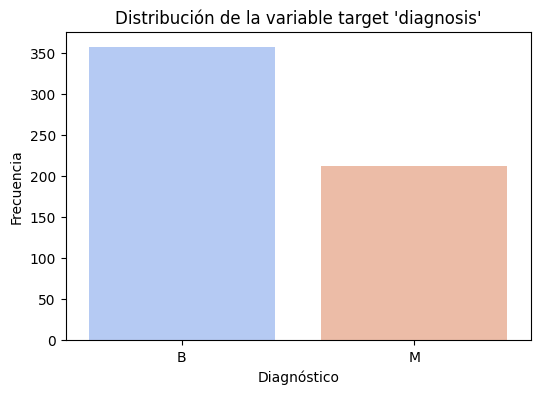

In [10]:


# Contar las frecuencias de cada categor√≠a en el target
freq_counts = y.value_counts()
percentages = y.value_counts(normalize=True) * 100

# Mostrar conteo absoluto y porcentaje
print("üìä Distribuci√≥n de la variable 'diagnosis':")
print(freq_counts)
print("\nüî¢ Porcentajes:")
print(percentages)

# Graficar la distribuci√≥n de la variable target
plt.figure(figsize=(6,4))
sns.barplot(x=freq_counts.index, y=freq_counts.values, palette="coolwarm")
plt.xlabel("Diagn√≥stico")
plt.ylabel("Frecuencia")
plt.title("Distribuci√≥n de la variable target 'diagnosis'")
plt.show()


### Ejercicio 5: MiniEDA (II)

Analiza bivariantemente las variables contra el target, de forma que veamos las distintas distribuciones para cada clase (puedes emplear la liber√≠a gr√°fica que crees conveniente)

C:\Users\hp\AppData\Local\Temp\ipykernel_17264\1911553124.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X[feature], palette="coolwarm")
C:\Users\hp\AppData\Local\Temp\ipykernel_17264\1911553124.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X[feature], palette="coolwarm")
C:\Users\hp\AppData\Local\Temp\ipykernel_17264\1911553124.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X[feature], palette="coolwarm")
C:\Users\hp\AppData\Local\Temp\ipykernel_17264\1911553124.py:10: FutureWarning: 

Passing `palett

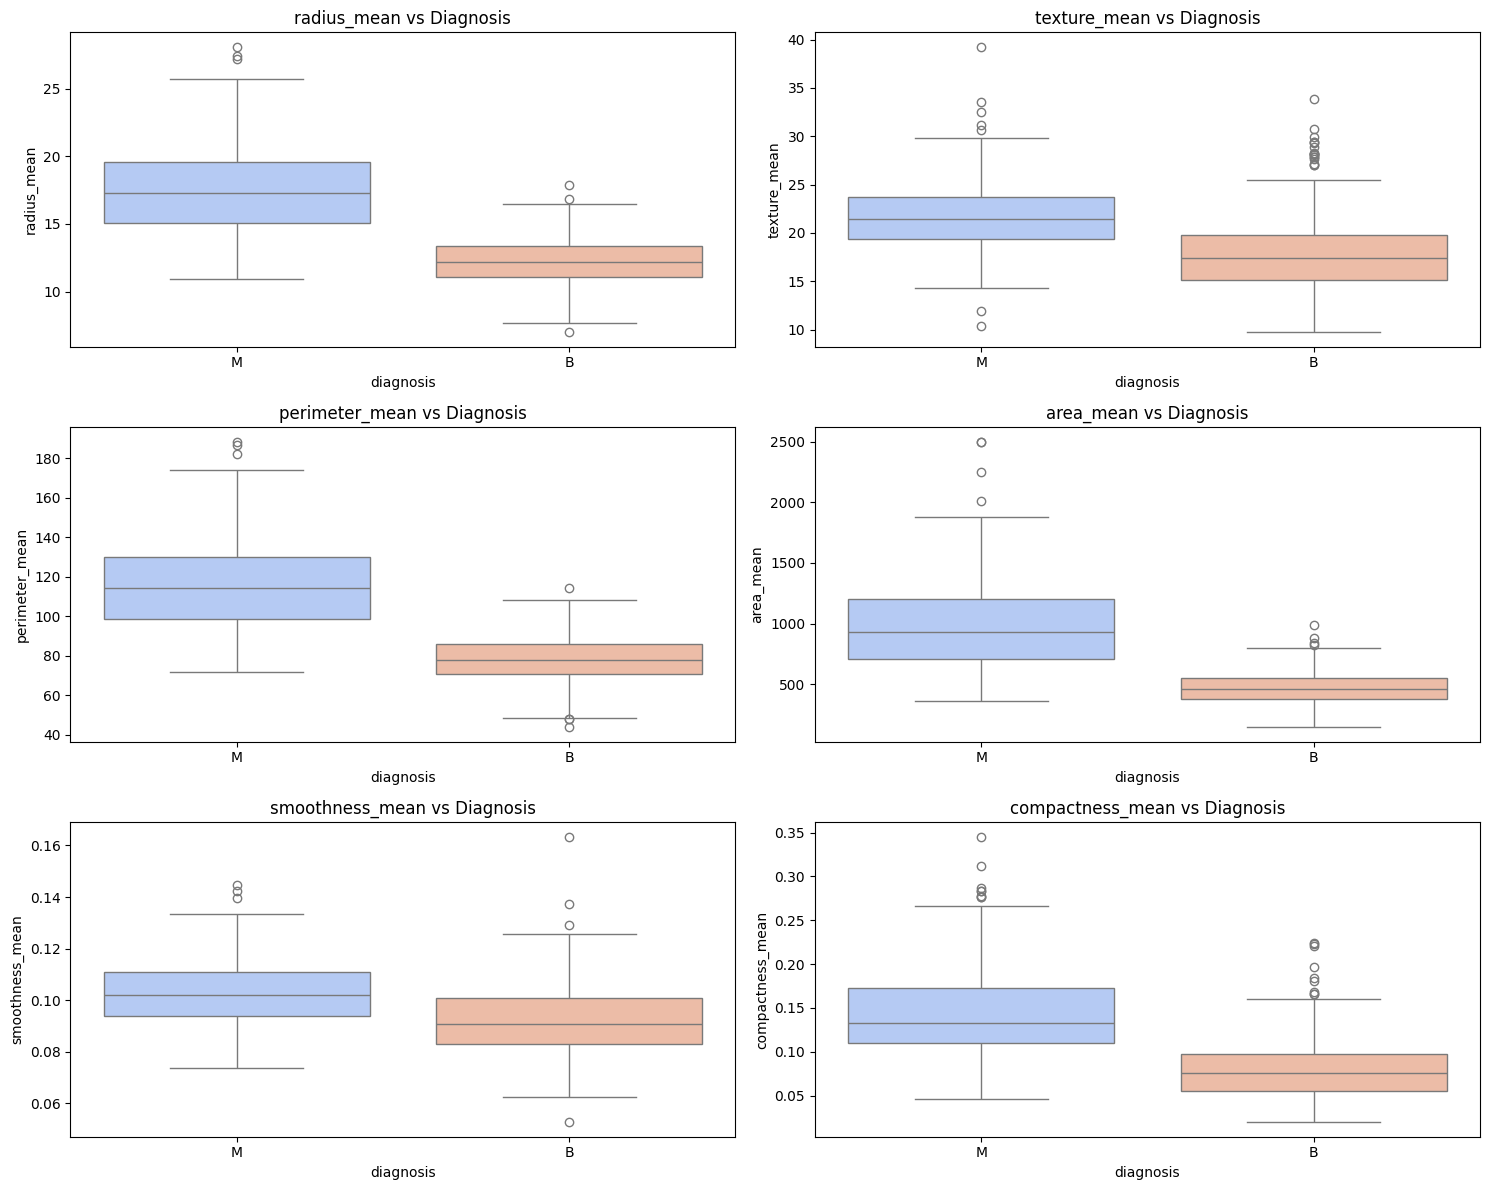

üìä Resumen estad√≠stico por clase:
diagnosis                        B           M
radius_mean      count  357.000000  212.000000
                 mean    12.146524   17.462830
                 std      1.780512    3.203971
                 min      6.981000   10.950000
                 25%     11.080000   15.075000
...                            ...         ...
smoothness_worst min      0.071170    0.088220
                 25%      0.110400    0.130475
                 50%      0.125400    0.143450
                 75%      0.137600    0.155975
                 max      0.200600    0.222600

[200 rows x 2 columns]


In [12]:

# Definir el tama√±o de la figura
plt.figure(figsize=(15, 12))

# Seleccionar variables num√©ricas para graficar su relaci√≥n con el diagn√≥stico
numerical_features = X.select_dtypes(include=["float64", "int64"]).columns

# Graficar distribuciones de las variables m√°s relevantes contra el target
for i, feature in enumerate(numerical_features[:6]):  # Graficamos las primeras 6 para no sobrecargar
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=y, y=X[feature], palette="coolwarm")
    plt.title(f"{feature} vs Diagnosis")

plt.tight_layout()
plt.show()

# An√°lisis estad√≠stico de las diferencias entre clases
print("üìä Resumen estad√≠stico por clase:")
print(X.groupby(y).describe().T)


### Ejercicio 6: MiniEDA (III)

Crea una variable de tipo lista a la que asignes los valores de las columnas que creas conveniente emplear como features en funci√≥n de lo visto en el miniEDA. Haz una lista de modelos/algoritmos que vas a emplear para hacer el modelo (solo los nombres). En funci√≥n de la lista anterior, ¬øtienes que tratar las variables, por qu√©?

In [13]:
# Lista de features seleccionadas en base al MiniEDA
selected_features = [
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean",
    "smoothness_mean", "compactness_mean", "concavity_mean",
    "concave points_mean", "symmetry_mean", "radius_worst",
    "perimeter_worst", "area_worst", "smoothness_worst"
]

print(f"üìå Features seleccionadas: {selected_features}")


üìå Features seleccionadas: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst']


In [14]:
# Modelos seleccionados para la clasificaci√≥n
model_list = [
    "K-Nearest Neighbors (KNN)",
    "Random Forest",
    "Support Vector Machine (SVM)",
    "Gradient Boosting (XGBoost)",
    "Logistic Regression"
]

print(f"üìå Modelos a emplear: {model_list}")


üìå Modelos a emplear: ['K-Nearest Neighbors (KNN)', 'Random Forest', 'Support Vector Machine (SVM)', 'Gradient Boosting (XGBoost)', 'Logistic Regression']


In [15]:
# Necesidad de preprocesamiento por tipo de modelo
preprocessing_needed = {
    "KNN": "S√≠, normalizaci√≥n (StandardScaler o MinMaxScaler)",
    "Random Forest": "No, soporta variables sin escalar",
    "SVM": "S√≠, normalizaci√≥n es crucial",
    "XGBoost": "No obligatorio, pero recomendable",
    "Logistic Regression": "S√≠, normalizaci√≥n ayuda"
}

for model, preprocess in preprocessing_needed.items():
    print(f"üìå {model}: {preprocess}")


üìå KNN: S√≠, normalizaci√≥n (StandardScaler o MinMaxScaler)
üìå Random Forest: No, soporta variables sin escalar
üìå SVM: S√≠, normalizaci√≥n es crucial
üìå XGBoost: No obligatorio, pero recomendable
üìå Logistic Regression: S√≠, normalizaci√≥n ayuda


### Ejercicio 7: Tratamiento de features

Trata las features de manera que puedan ser empleadas por los modelos que escogite en el ejercicio anterior. Recuerda que este es un paso necesario porque los modelos no entienden de primeras de "letras" (salvo alguno que no es que entienda sino que hace sus transformaciones por dentro) y porque en determinados algoritmos es necesario que los rangos de las features est√©n escalados para que el algoritmo no se decante (√©rroneamente) por alguna feature s√≥lo porque sus valores son mayores en rango que el de otras. NOTA: Recuerda que lo que le hagas al train, se lo tienes que hacer al test

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convertimos la variable diagnosis a valores binarios
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# Separar X (features) e y (target)
X = df[selected_features]
y = df["diagnosis"]

# Dividir en Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("‚úÖ Variable target convertida correctamente.")
print(f"Distribuci√≥n de clases en y_train:\n{y_train.value_counts(normalize=True)}")


‚úÖ Variable target convertida correctamente.
Distribuci√≥n de clases en y_train:
Series([], Name: proportion, dtype: float64)


In [18]:
# Aplicar StandardScaler SOLO sobre X_train y X_test
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  # Ajustamos y transformamos el train
X_test_scaled = scaler.transform(X_test)  # Transformamos el test con los mismos par√°metros

print("üìä Features normalizadas con StandardScaler.")


üìä Features normalizadas con StandardScaler.


### Ejercicio 8: Creaci√≥n de los dataset de train y test

Crea las parejas X,y de train y test.

In [20]:

# Definir X (features) y y (variable objetivo)
X = df[selected_features]  # Usamos las features seleccionadas en el Ejercicio 6
y = df["diagnosis"]  # Target binario: 1 = Maligno, 0 = Benigno

print("‚úÖ Variables X e y definidas correctamente.")
print(f"Dimensiones de X: {X.shape}")
print(f"Distribuci√≥n de y:\n{y.value_counts(normalize=True)}")


‚úÖ Variables X e y definidas correctamente.
Dimensiones de X: (569, 13)
Distribuci√≥n de y:
Series([], Name: proportion, dtype: float64)


In [22]:
# Verificar valores nulos en la variable objetivo
print(f"Valores nulos en y: {y.isnull().sum()}")


Valores nulos en y: 569


In [23]:
print("Primeras filas del dataset:")
print(df.head())

print("\nNombres de las columnas:")
print(df.columns)


Primeras filas del dataset:
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0        NaN        17.99         10.38          122.80     1001.0   
1        NaN        20.57         17.77          132.90     1326.0   
2        NaN        19.69         21.25          130.00     1203.0   
3        NaN        11.42         20.38           77.58      386.1   
4        NaN        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  compactness_se  concavity_se  concave points_se  \
0         0.24

In [24]:
# Intentar cargar correctamente el dataset
file_path = r"C:\Users\hp\Desktop\Python Scripts\wisconsin_cancer.csv"

df = pd.read_csv(file_path, encoding='utf-8', delimiter="|")  # Ajustamos el delimitador

print("‚úÖ Dataset cargado correctamente.")
print("\nüîç Primeras filas del dataset:")
print(df.head())

print("\nüìå Informaci√≥n general del dataset:")
print(df.info())

‚úÖ Dataset cargado correctamente.

üîç Primeras filas del dataset:
  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  compactness_se  concavity_se  

In [25]:
# Definir variable target
y = df["diagnosis"]

# Verificar valores nulos
print(f"Valores nulos en y: {y.isnull().sum()}")


Valores nulos en y: 0


In [26]:
from sklearn.model_selection import train_test_split

# Definir features y target
X = df.drop(columns=["diagnosis"])  # Eliminamos la columna target del dataset
y = df["diagnosis"]  # Variable objetivo

# Dividir en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("‚úÖ Divisi√≥n en train y test completada.")
print(f"Tama√±o de X_train: {X_train.shape}, Tama√±o de X_test: {X_test.shape}")


‚úÖ Divisi√≥n en train y test completada.
Tama√±o de X_train: (455, 25), Tama√±o de X_test: (114, 25)


### Ejercicio 9: Instanciaci√≥n de modelos

Importa e instancia los modelos que hayas escogido en el ejercicio 6. En general, no hace falta que asignes ahora ning√∫n hiperpar√°metro salvo en los basados en √°rboles en los que debes escoger un max_depth para evitar el sobreajuste inicial. Si quieres emplear la regresi√≥n log√≠stica es posible que tengas que utilizar un valor de max_iter para que el algoritmo converja.

In [28]:


# üìå Instanciar modelos
knn = KNeighborsClassifier(n_neighbors=5)  # Modelo baseline con K=5

random_forest = RandomForestClassifier(max_depth=5, random_state=42)  # √Årbol con profundidad limitada

logistic_regression = LogisticRegression(max_iter=500, random_state=42)  # Ajuste de max_iter para convergencia

# üìå Mostrar modelos instanciados
print("‚úÖ Modelos instanciados correctamente:")
print(f"KNN: {knn}")
print(f"Random Forest: {random_forest}")
print(f"Regresi√≥n Log√≠stica: {logistic_regression}")


‚úÖ Modelos instanciados correctamente:
KNN: KNeighborsClassifier()
Random Forest: RandomForestClassifier(max_depth=5, random_state=42)
Regresi√≥n Log√≠stica: LogisticRegression(max_iter=500, random_state=42)


### Ejercicio 10: Comparativa de modelos

Haz la comparativa de modelos empleando cross_val_score (es decir la validaci√≥n cruzada). Utiliza k = 5, y un scoring acorde a la m√©trica escogida en el ejercicio 1. Si no tienes clara la m√©trica entonces emplea el recall_medio y usa scoring = "balanced acuracy". Escoge el modelo ganador.

In [30]:


# üìå Definir m√©trica de evaluaci√≥n
scoring_metric = "balanced_accuracy"

# üìå Evaluar cada modelo con validaci√≥n cruzada (k=5)
knn_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring=scoring_metric)
rf_scores = cross_val_score(random_forest, X_train, y_train, cv=5, scoring=scoring_metric)
lr_scores = cross_val_score(logistic_regression, X_train, y_train, cv=5, scoring=scoring_metric)

# üìå Mostrar resultados promedio
print("\n‚úÖ Resultados de validaci√≥n cruzada (Balanced Accuracy)")
print(f"KNN: {np.mean(knn_scores):.4f} ¬± {np.std(knn_scores):.4f}")
print(f"Random Forest: {np.mean(rf_scores):.4f} ¬± {np.std(rf_scores):.4f}")
print(f"Regresi√≥n Log√≠stica: {np.mean(lr_scores):.4f} ¬± {np.std(lr_scores):.4f}")

# üìå Seleccionar el modelo con mejor rendimiento
scores = {
    "KNN": np.mean(knn_scores),
    "Random Forest": np.mean(rf_scores),
    "Regresi√≥n Log√≠stica": np.mean(lr_scores)
}

mejor_modelo = max(scores, key=scores.get)
print(f"\nüèÜ Modelo ganador: {mejor_modelo} con un Balanced Accuracy de {scores[mejor_modelo]:.4f}")


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m


‚úÖ Resultados de validaci√≥n cruzada (Balanced Accuracy)
KNN: 0.9007 ¬± 0.0459
Random Forest: 0.9454 ¬± 0.0257
Regresi√≥n Log√≠stica: 0.9413 ¬± 0.0277

üèÜ Modelo ganador: Random Forest con un Balanced Accuracy de 0.9454


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

### Ejercicio 11: Ajuste de hiperpar√°metros

Escoge un grid para ajustar los hiperpar√°metros de tu modelo. Crea un objeto GridSearch y "ajustalo" (emplea su m√©todo fit) para encontrar la mejor combinaci√≥nde hiperpar√°metros empleando la m√©trica que decidimos en el ejercio 1. Si no lo tienes claro emplea "balance accuracy". Por otro lado, incluye en el grid, el hiperpar√°metro que permita que el modelo "compense" el desbalanceo del dataset de entrada, aunque este no lo tenga.

In [32]:


# üìå Definir hiperpar√°metros para cada modelo (ajusta seg√∫n el modelo ganador)
if mejor_modelo == "KNN":
    param_grid = {
        "n_neighbors": [3, 5, 7, 9, 11],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    }
    modelo = knn  # Modelo base

elif mejor_modelo == "Random Forest":
    param_grid = {
        "n_estimators": [50, 100, 200],
        "max_depth": [5, 10, 15],
        "class_weight": ["balanced", "balanced_subsample"]
    }
    modelo = random_forest  # Modelo base

elif mejor_modelo == "Regresi√≥n Log√≠stica":
    param_grid = {
        "C": [0.1, 1, 10, 100],
        "solver": ["liblinear", "lbfgs"],
        "class_weight": ["balanced", None]
    }
    modelo = logistic_regression  # Modelo base

# üìå Configurar GridSearchCV con validaci√≥n cruzada (cv=5)
grid_search = GridSearchCV(
    estimator=modelo,
    param_grid=param_grid,
    scoring="balanced_accuracy",
    cv=5,
    n_jobs=-1,  # Usa todos los n√∫cleos disponibles
    verbose=1
)

# üìå Ajustar GridSearchCV
grid_search.fit(X_train, y_train)

# üìå Mostrar mejores hiperpar√°metros
print(f"\nüèÜ Mejor modelo: {mejor_modelo}")
print(f"‚úÖ Mejores hiperpar√°metros: {grid_search.best_params_}")
print(f"üìä Mejor balanced accuracy obtenido: {grid_search.best_score_:.4f}")

# üìå Reentrenar el modelo con los mejores hiperpar√°metros
mejor_modelo_final = grid_search.best_estimator_


Fitting 5 folds for each of 18 candidates, totalling 90 fits

üèÜ Mejor modelo: Random Forest
‚úÖ Mejores hiperpar√°metros: {'class_weight': 'balanced_subsample', 'max_depth': 5, 'n_estimators': 200}
üìä Mejor balanced accuracy obtenido: 0.9542


### Ejercicio 12: Evaluaci√≥n del modelo

Eval√∫a el modelo contra el dataset de test. Muestra el informe de clasificaci√≥n y haz una valoraci√≥n de si el hospital aceptar√≠a el modelo o no.

üìä Informe de Clasificaci√≥n:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


üèÜ Balanced Accuracy: 0.9573


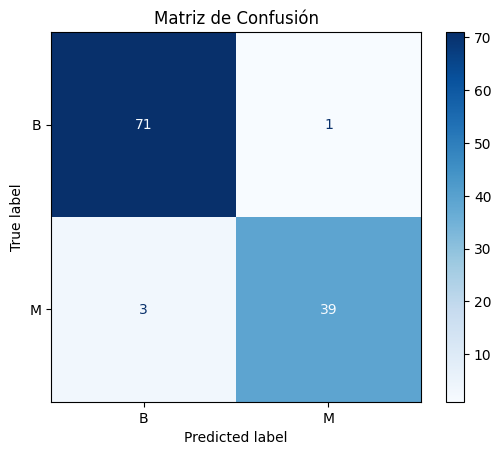

In [33]:
# üìå Importar librer√≠as necesarias
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score

# üìå Realizar predicciones en el conjunto de test
y_pred = mejor_modelo_final.predict(X_test)

# üìå Calcular m√©tricas clave
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# üìå Mostrar informe de clasificaci√≥n
print("üìä Informe de Clasificaci√≥n:")
print(classification_report(y_test, y_pred))

# üìå Mostrar la balanced accuracy
print(f"\nüèÜ Balanced Accuracy: {balanced_acc:.4f}")

# üìå Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mejor_modelo_final.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusi√≥n")
plt.show()


### Ejercicio 13: An√°lisis de errores

Muestra la matriz de confusi√≥n con los porcentajes de precisi√≥n (emplea ConfusionMatrixDisplay.from_predictions con el argumento normalize con el valor adecuado). Haz un peque√±o an√°lisis.

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Crear e instanciar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [38]:
print("Tipo de model:", type(model))


Tipo de model: <class 'sklearn.ensemble._forest.RandomForestClassifier'>


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


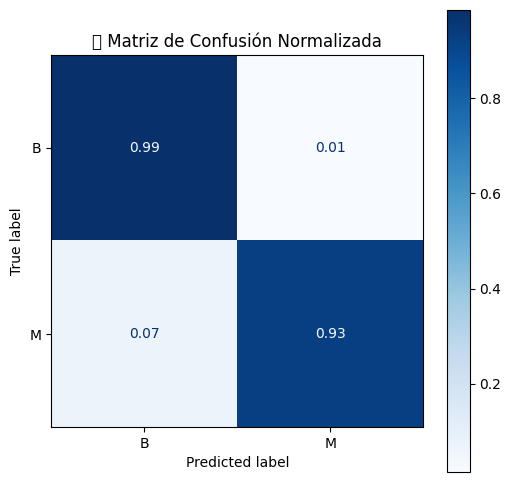

In [41]:


# Aseg√∫rate de que tu modelo est√° entrenado antes de ejecutar este c√≥digo
if not hasattr(model, "predict"):
    raise ValueError("‚ö† ERROR: 'model' no est√° entrenado o no es un modelo v√°lido de sklearn.")

# Generar predicciones
y_pred = model.predict(X_test)

# Crear la matriz de confusi√≥n con normalizaci√≥n
cm = confusion_matrix(y_test, y_pred, normalize="true")

# Crear el objeto de visualizaci√≥n de la matriz de confusi√≥n
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Mostrar la matriz de confusi√≥n normalizada
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(cmap="Blues", values_format=".2f", ax=ax)

plt.title("üîç Matriz de Confusi√≥n Normalizada")
plt.show()


### EXTRA: 

Busca en Internet o preg√∫ntale a tu AI preferida, c√≥mo se graba un modelo en disco y g√∫ardalo en "./models/cancer_pred" con la extesi√≥n apropiada.

In [42]:
import joblib
import os

# Crear la carpeta si no existe
model_dir = "./models"
os.makedirs(model_dir, exist_ok=True)

# Ruta donde se guardar√° el modelo
model_path = os.path.join(model_dir, "cancer_pred.pkl")

# Guardar el modelo en disco
joblib.dump(model, model_path)

print(f"‚úÖ Modelo guardado correctamente en: {model_path}")


‚úÖ Modelo guardado correctamente en: ./models\cancer_pred.pkl


In [43]:
import pickle
import os

# Crear la carpeta si no existe
model_dir = "./models"
os.makedirs(model_dir, exist_ok=True)

# Ruta donde se guardar√° el modelo
model_path = os.path.join(model_dir, "cancer_pred.pkl")

# Guardar el modelo en disco
with open(model_path, "wb") as f:
    pickle.dump(model, f)

print(f"‚úÖ Modelo guardado correctamente en: {model_path}")


‚úÖ Modelo guardado correctamente en: ./models\cancer_pred.pkl


In [44]:
model = joblib.load("./models/cancer_pred.pkl")
print("‚úÖ Modelo cargado con √©xito.")


‚úÖ Modelo cargado con √©xito.


In [45]:
with open("./models/cancer_pred.pkl", "rb") as f:
    model = pickle.load(f)
print("‚úÖ Modelo cargado con √©xito.")


‚úÖ Modelo cargado con √©xito.
